<a href="https://colab.research.google.com/github/nadiaaboudias/JeuDeRole/blob/main/Copie_de_SPLEX_TME_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SPLEX TME 1

## Exploratory Analysis with Significance Tests. Multiple Hypothesis Testing. Handling Missing Data. AdaBoost

### Data
We explore two data sets downloadable from the Machine Learning Repository (http://archive.ics.uci.edu/ml/index.php)

- Breast Cancer Wisconsin (Diagnostic) Data Set (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

- Mice Protein Expression Data Set (https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Fatema/Exo/data

/content/drive/MyDrive/Colab Notebooks/Fatema/Exo/data


### Exploratory Analysis

We will perform an exploratory analysis with Python. You can use the Spyder environment which is already installed on the machines. Or the notebook if you prefer. You will need to load the following packages:

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.sandbox.stats.multicomp as sm
from scipy.stats import spearmanr

# First Data : Breast Cancer Wisconsin

In [ ]:
# 1. Load the data sets (Breast Cancer data set and the Mice)

In [ ]:
# 1. a. Install library
!pip install ucimlrepo

In [ ]:
# 1. b. Load Breast Cancer Wisconsin (Diagnostic) Data Set
from ucimlrepo import fetch_ucirepo
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
XBreastCancer = breast_cancer_wisconsin_diagnostic.data.features
YBreastCancer = breast_cancer_wisconsin_diagnostic.data.targets

In [ ]:
XBreastCancer.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
XBreastCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [ ]:
# Checking for null values
XBreastCancer.isna().sum()
# There is no missing values in the data
# If it is the case
# XBreastCancer.fillna(XBreastCancer.median(), inplace=True)

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

In [ ]:
#Remark. Both the Mice data set and the Breast Cancer are binary classification tasks (M and B
#are two classes in the Breast Cancer, and Ts65Dn and Control for the Mice)YBreastCancer['Diagnosis'].unique()

In [ ]:
YBreastCancer['Diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
#Transform categorical variable to numerical value. Replace "M" by 1 and "B" by 0
YBreastCancer['Diagnosis'] = YBreastCancer['Diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

<ipython-input-70-5bef6d9640e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  YBreastCancer['Diagnosis'] = YBreastCancer['Diagnosis'].apply(lambda val: 1 if val == 'M' else 0)


In [ ]:
# Add a column name Diagnosis to XBreastCancer = to find the correlation coefficients between variables
XBreastCancer["Diagnosis"] = YBreastCancer['Diagnosis']
print(XBreastCancer)

     radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0      17.99     10.38      122.80  1001.0      0.11840       0.27760   
1      20.57     17.77      132.90  1326.0      0.08474       0.07864   
2      19.69     21.25      130.00  1203.0      0.10960       0.15990   
3      11.42     20.38       77.58   386.1      0.14250       0.28390   
4      20.29     14.34      135.10  1297.0      0.10030       0.13280   
..       ...       ...         ...     ...          ...           ...   
564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
566    16.60     28.08      108.30   858.1      0.08455       0.10230   
567    20.60     29.33      140.10  1265.0      0.11780       0.27700   
568     7.76     24.54       47.92   181.0      0.05263       0.04362   

     concavity1  concave_points1  symmetry1  fractal_dimension1  ...  \
0       0.30010          0.14710     0.2419        

<ipython-input-11-8be1976b5433>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XBreastCancer["Diagnosis"] = YBreastCancer['Diagnosis']


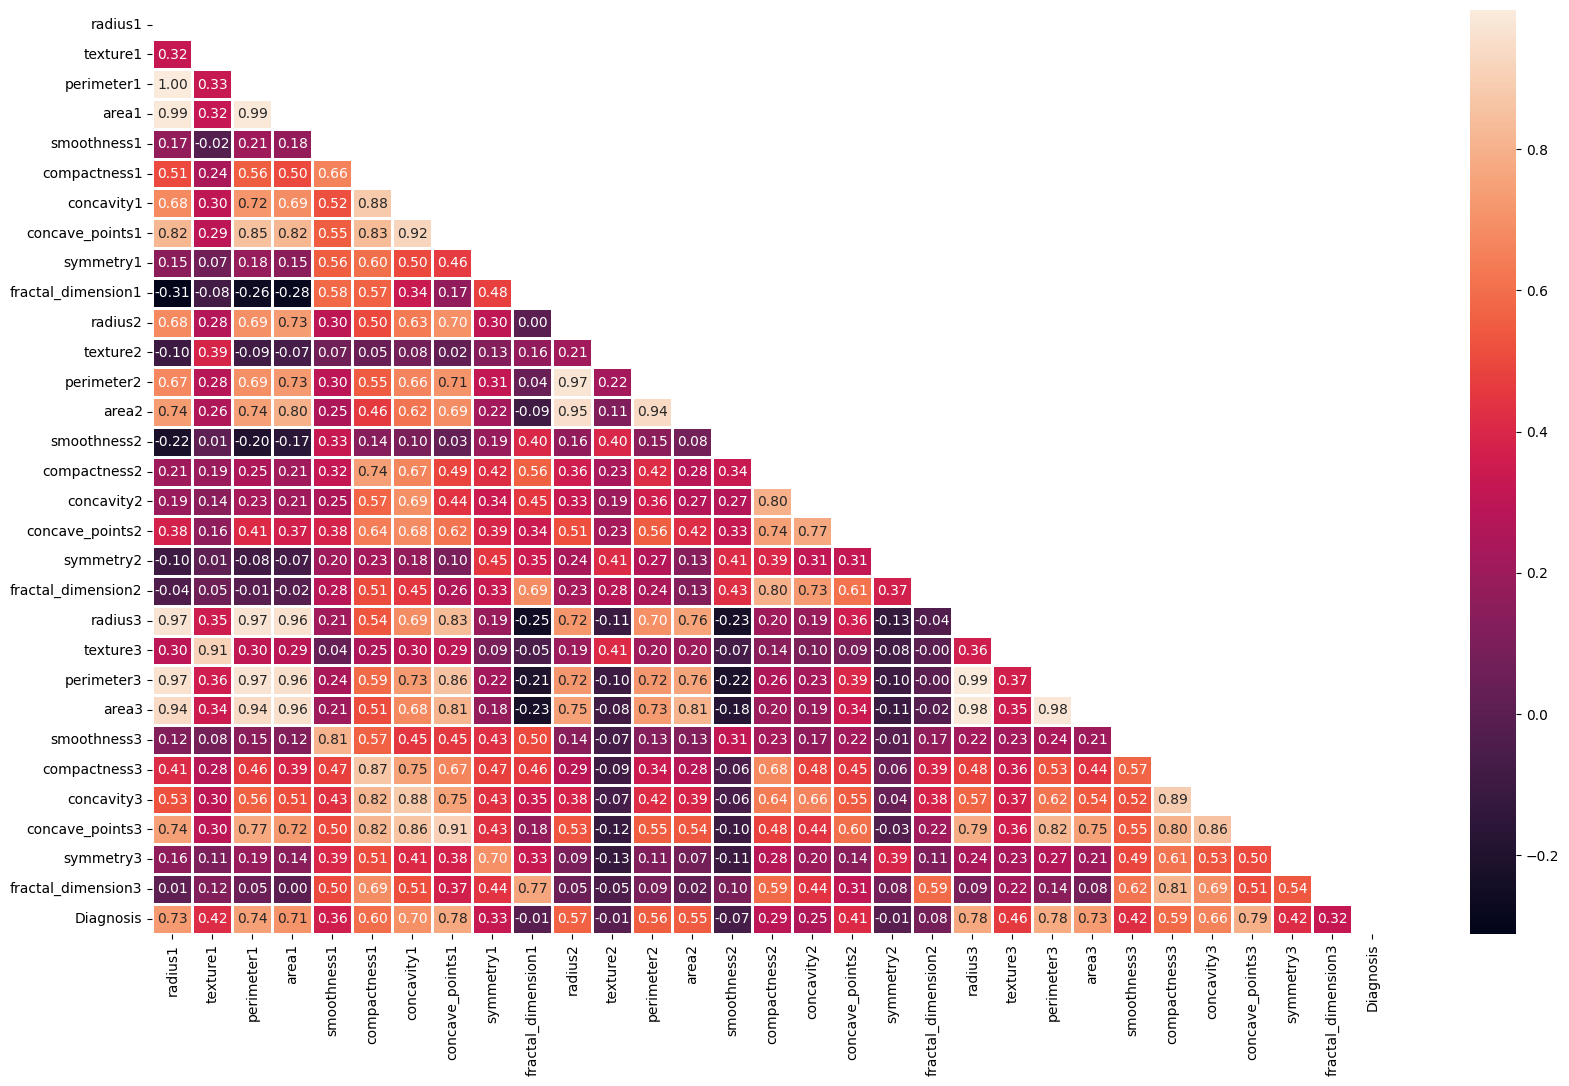

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df_breast_cancer = XBreastCancer + YBreastCancer
plt.figure(figsize = (20, 12))

corr = XBreastCancer.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

# We can see that there are many columns which are very highly correlated. We can remove columns that have a high absolute correlation with each other as it can cause instability and overfitting in certain algorithms. (eliminate multicollinearity, where 2 or more variables are highly correlated)

In [ ]:
# 4. Find correlated variables in both data sets. Find the correlation coefficients between variables with corr, pval = spearmanr(data1, data2). Are there a lot of variables which are strongly correlated? What is the meaning of the sign of the correlation coefficient?
spearman_correlations = {}
for col in XBreastCancer.columns:
    if col != "Diagnosis":
      correlation, _ = spearmanr(XBreastCancer[col], YBreastCancer['Diagnosis'])  # Assuming 'target' is the target variable
      spearman_correlations[col] = correlation


In [ ]:
# Create a DataFrame to display the results
correlation_df = pd.DataFrame.from_dict(spearman_correlations, orient='index', columns=['Spearman Correlation'])

# Sort the variables by their correlation values
correlation_df = correlation_df.sort_values(by='Spearman Correlation', ascending=False)

# Print or display the results
print(correlation_df)

                    Spearman Correlation
perimeter3                      0.796319
radius3                         0.787933
area3                           0.786902
concave_points3                 0.781674
concave_points1                 0.777877
perimeter1                      0.748496
area1                           0.734122
concavity1                      0.733308
radius1                         0.732785
area2                           0.714184
concavity3                      0.705734
perimeter2                      0.630411
radius2                         0.616912
compactness1                    0.609288
compactness3                    0.606810
concave_points2                 0.488717
texture3                        0.476720
concavity2                      0.470338
texture1                        0.461971
smoothness3                     0.425513
symmetry3                       0.396843
compactness2                    0.380666
smoothness1                     0.371892
symmetry1       

Find correlated variables in both data sets. Find the correlation coefficients between variables
with corr, pval = spearmanr(data1, data2). Are there a lot of variables which are strongly
correlated? What is the meaning of the sign of the correlation coefficient?

The correlation coefficient can range from -1 to 1, with the following interpretations:
1. Positive Correlation (correlation coefficient close to 1): When the correlation coefficient is close to 1, it indicates a strong positive correlation. This means that as one variable increases, the other variable tends to increase as well.

2. No Correlation (correlation coefficient close to 0): When the correlation coefficient is close to 0, it suggests no significant linear or monotonic relationship between the variables.

3. Negative Correlation (correlation coefficient close to -1): When the correlation coefficient is close to -1, it implies a strong negative correlation. This means that as one variable increases, the other variable tends to decrease.

The sign of the correlation coefficient tells you about the direction of the relationship:

Positive correlation: When the correlation coefficient is positive, it indicates that the two variables tend to move in the same direction. When one increases, the other tends to increase.

Negative correlation: When the correlation coefficient is negative, it means the two variables tend to move in opposite directions. When one increases, the other tends to decrease.


In [ ]:
# Compare the distributions of variables in two classes with stats.ttest ind().
# Group your data by class
first_class = XBreastCancer[XBreastCancer["Diagnosis"] == 0]
second_class = XBreastCancer[XBreastCancer["Diagnosis"] == 1]

# Loop through each variable and perform two-sample t-test
for var in XBreastCancer.columns:
    if var != "Diagnosis":
      variable_to_compare_A = first_class[var]
      variable_to_compare_B = second_class[var]

      t_statistic, p_value = stats.ttest_ind(variable_to_compare_A, variable_to_compare_B)

      print(f"Variable: {var}")
      print(f"  T-Statistic: {t_statistic}")
      print(f"  P-Value: {p_value}")


Variable: radius1
  T-Statistic: -25.435821610057054
  P-Value: 8.465940572262422e-96
Variable: texture1
  T-Statistic: -10.86720108146434
  P-Value: 4.0586360478980736e-25
Variable: perimeter1
  T-Statistic: -26.405212979192665
  P-Value: 8.43625103617473e-101
Variable: area1
  T-Statistic: -23.938687235690992
  P-Value: 4.734564310307344e-88
Variable: smoothness1
  T-Statistic: -9.146098808149038
  P-Value: 1.0518503592032013e-18
Variable: compactness1
  T-Statistic: -17.69839197688993
  P-Value: 3.9382631058873895e-56
Variable: concavity1
  T-Statistic: -23.103963430622642
  P-Value: 9.966555755072963e-84
Variable: concave_points1
  T-Statistic: -29.354318592113618
  P-Value: 7.101150161057422e-116
Variable: symmetry1
  T-Statistic: -8.338311789592808
  P-Value: 5.733384028466827e-16
Variable: fractal_dimension1
  T-Statistic: 0.30571112978583087
  P-Value: 0.7599368037256238
Variable: radius2
  T-Statistic: -16.39635102598575
  P-Value: 9.73894865646109e-50
Variable: texture2
  T-S

In [ ]:
# Compare the distributions of variables in two classes with stats.ttest ind().
# Group your data by class
first_class = XBreastCancer[XBreastCancer["Diagnosis"] == 0]
second_class = XBreastCancer[XBreastCancer["Diagnosis"] == 1]

# Define the significance level (alpha)
alpha = 0.05  # You can adjust this value based on your desired level of significance

p_values = []
# Loop through each variable and perform two-sample t-test
for var in XBreastCancer.columns:
    if var != "Diagnosis":
      variable_to_compare_A = first_class[var]
      variable_to_compare_B = second_class[var]

      t_statistic, p_value = stats.ttest_ind(variable_to_compare_A, variable_to_compare_B)
      p_values.append(p_value)
      print(f"Variable: {var}")
      print(f"  T-Statistic: {t_statistic}")
      print(f"  P-Value: {p_value}")

      if p_value < alpha:
          print("  The means of the two classes are significantly different.")
      else:
          print("  The means of the two classes are not significantly different.")



Variable: radius1
  T-Statistic: -25.435821610057054
  P-Value: 8.465940572262422e-96
  The means of the two classes are significantly different.
Variable: texture1
  T-Statistic: -10.86720108146434
  P-Value: 4.0586360478980736e-25
  The means of the two classes are significantly different.
Variable: perimeter1
  T-Statistic: -26.405212979192665
  P-Value: 8.43625103617473e-101
  The means of the two classes are significantly different.
Variable: area1
  T-Statistic: -23.938687235690992
  P-Value: 4.734564310307344e-88
  The means of the two classes are significantly different.
Variable: smoothness1
  T-Statistic: -9.146098808149038
  P-Value: 1.0518503592032013e-18
  The means of the two classes are significantly different.
Variable: compactness1
  T-Statistic: -17.69839197688993
  P-Value: 3.9382631058873895e-56
  The means of the two classes are significantly different.
Variable: concavity1
  T-Statistic: -23.103963430622642
  P-Value: 9.966555755072963e-84
  The means of the two c

In [ ]:
# We perform a multiple hypothesis testing (since we have a lot of variables), and we need to adjust
#the p-values. You can adjust the p-values with sm.multipletests()
# Define the significance level (alpha)
alpha = 0.05

# Perform p-value adjustment using the Benjamini-Hochberg method. Can use another methods:least stringent method
rejected, adjusted_p_values, _, _ = sm.multipletests(p_values, alpha=alpha, method='fdr_bh')

# Create a DataFrame to display the results
results = pd.DataFrame({
    'Original P-Value': p_values,
    'Adjusted P-Value (FDR-BH)': adjusted_p_values,
    'Rejected (at alpha = 0.05)': rejected
})

# Display the results
print(results)

    Original P-Value  Adjusted P-Value (FDR-BH)  Rejected (at alpha = 0.05)
0       8.465941e-96               3.628260e-95                        True
1       4.058636e-25               6.408373e-25                        True
2      8.436251e-101              5.061751e-100                        True
3       4.734564e-88               1.775462e-87                        True
4       1.051850e-18               1.502643e-18                        True
5       3.938263e-56               1.074072e-55                        True
6       9.966556e-84               3.322185e-83                        True
7      7.101150e-116              6.361719e-115                        True
8       5.733384e-16               7.818251e-16                        True
9       7.599368e-01               8.142180e-01                       False
10      9.738949e-50               2.247450e-49                        True
11      8.433320e-01               8.724124e-01                       False
12      1.65

## Test with bonferroni = most stringent

In [ ]:
# Define the significance level (alpha)
alpha = 0.05

# Perform p-value adjustment using the Benjamini-Hochberg method. Can use another methods:
rejected, adjusted_p_values, _, _ = sm.multipletests(p_values, alpha=alpha, method='bonferroni')

# Create a DataFrame to display the results
results = pd.DataFrame({
    'Original P-Value': p_values,
    'Adjusted P-Value (FDR-BH)': adjusted_p_values,
    'Rejected (at alpha = 0.05)': rejected
})

# Display the results
print(results)

    Original P-Value  Adjusted P-Value (FDR-BH)  Rejected (at alpha = 0.05)
0       8.465941e-96               2.539782e-94                        True
1       4.058636e-25               1.217591e-23                        True
2      8.436251e-101               2.530875e-99                        True
3       4.734564e-88               1.420369e-86                        True
4       1.051850e-18               3.155551e-17                        True
5       3.938263e-56               1.181479e-54                        True
6       9.966556e-84               2.989967e-82                        True
7      7.101150e-116              2.130345e-114                        True
8       5.733384e-16               1.720015e-14                        True
9       7.599368e-01               1.000000e+00                       False
10      9.738949e-50               2.921685e-48                        True
11      8.433320e-01               1.000000e+00                       False
12      1.65

In [ ]:
# Define the significance level (alpha)
alpha = 0.05

# Perform p-value adjustment using the Benjamini-Hochberg method. Can use another methods:
rejected, adjusted_p_values, _, _ = sm.multipletests(p_values, alpha=alpha, method='holm')

# Create a DataFrame to display the results
results = pd.DataFrame({
    'Original P-Value': p_values,
    'Adjusted P-Value (FDR-BH)': adjusted_p_values,
    'Rejected (at alpha = 0.05)': rejected
})

# Display the results
print(results)

    Original P-Value  Adjusted P-Value (FDR-BH)  Rejected (at alpha = 0.05)
0       8.465941e-96               2.031826e-94                        True
1       4.058636e-25               4.870363e-24                        True
2      8.436251e-101               2.193425e-99                        True
3       4.734564e-88               1.088950e-86                        True
4       1.051850e-18               1.051850e-17                        True
5       3.938263e-56               7.876526e-55                        True
6       9.966556e-84               2.192642e-82                        True
7      7.101150e-116              1.988322e-114                        True
8       5.733384e-16               5.160046e-15                        True
9       7.599368e-01               1.000000e+00                       False
10      9.738949e-50               1.753011e-48                        True
11      8.433320e-01               1.000000e+00                       False
12      1.65

## Boxplot

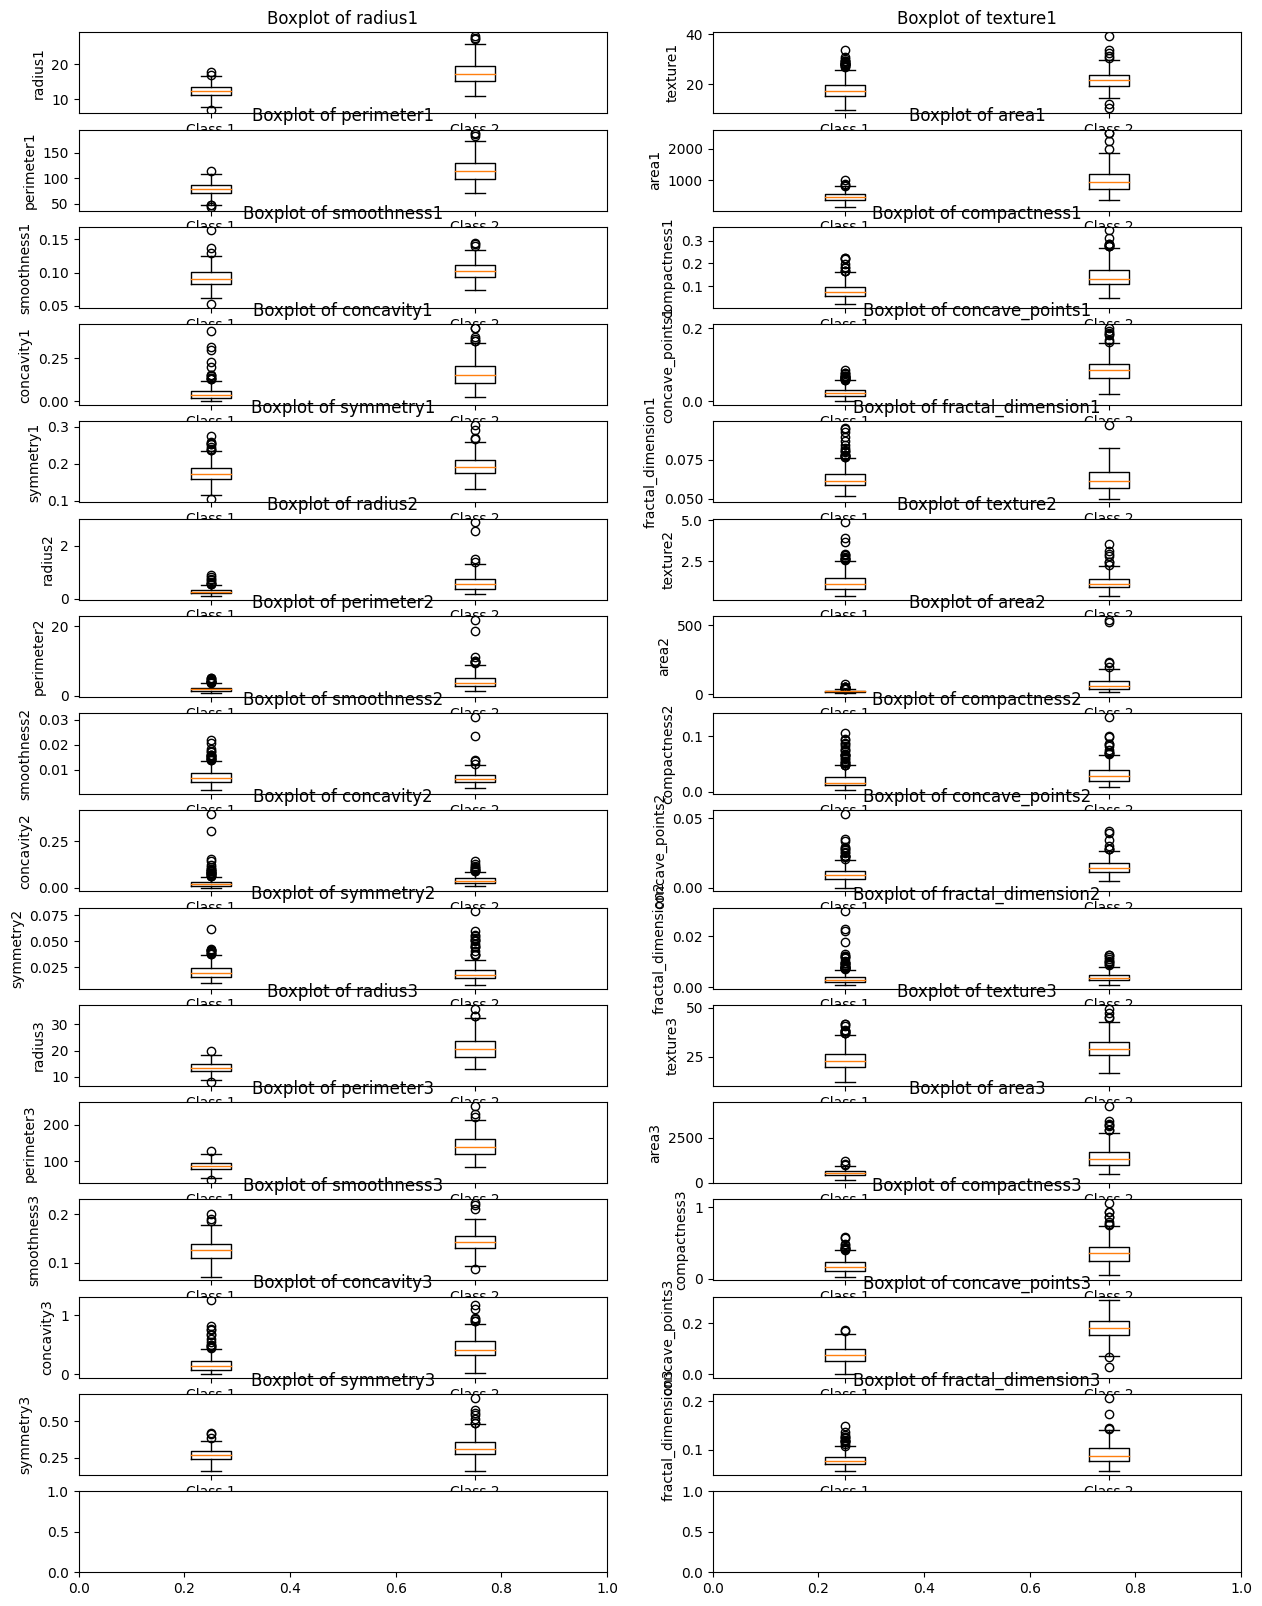

In [ ]:
# Create boxplots for each variable in class 1 and class 2
# Define the number of rows and columns for the subplots
import matplotlib.pyplot as plt

num_rows = (len(XBreastCancer.columns) -1) // 2 + 1
num_cols = 2
# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
# Flatten the axes array for easy indexing
axes = axes.ravel()
for i, variable_name in enumerate(XBreastCancer.columns):
  if variable_name != "Diagnosis":
    ax = axes[i]
    ax.boxplot([first_class[variable_name], second_class[variable_name]])
    ax.set_title(f'Boxplot of {variable_name}')
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['Class 1', 'Class 2'])
    ax.set_xlabel('Class')
    ax.set_ylabel(variable_name)

# Adaboost

In [ ]:
# Split data
from sklearn.model_selection import train_test_split
XBreastCancer = XBreastCancer.drop(["Diagnosis"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(XBreastCancer, YBreastCancer, test_size=0.20, random_state=101)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(455, 30)
(455, 1)
(114, 30)
(114, 1)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=5, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9473684210526315

#  Test various number of weak lerners

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.utils.validation import column_or_1d
# Define a range of values for the number of weak learners (estimators)
n_estimators_values = [10, 50, 100, 200, 300]

# Initialize lists to store cross-validation scores
cv_scores = []
y_train = column_or_1d(y_train)
# y.shape = (455,)
# Loop through different values of n_estimators and perform cross-validation
for n_estimators in n_estimators_values:
    ada_boost = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
    scores = cross_val_score(ada_boost, X_test, y_test, cv=5)  # You can adjust the number of cross-validation folds (cv) as needed
    cv_scores.append(np.mean(scores))

# Find the value of n_estimators that results in the highest cross-validation score
best_n_estimators = n_estimators_values[np.argmax(cv_scores)]

# Print the cross-validation scores for different values of n_estimators
for n, score in zip(n_estimators_values, cv_scores):
    print(f"n_estimators = {n}: Mean Accuracy = {score:.4f}")

print(f"Best n_estimators: {best_n_estimators}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

n_estimators = 10: Mean Accuracy = 0.9213
n_estimators = 50: Mean Accuracy = 0.9126
n_estimators = 100: Mean Accuracy = 0.9123
n_estimators = 200: Mean Accuracy = 0.9040
n_estimators = 300: Mean Accuracy = 0.8949
Best n_estimators: 10


<ipython-input-186-d1047477bb4e>:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-186-d1047477bb4e>:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


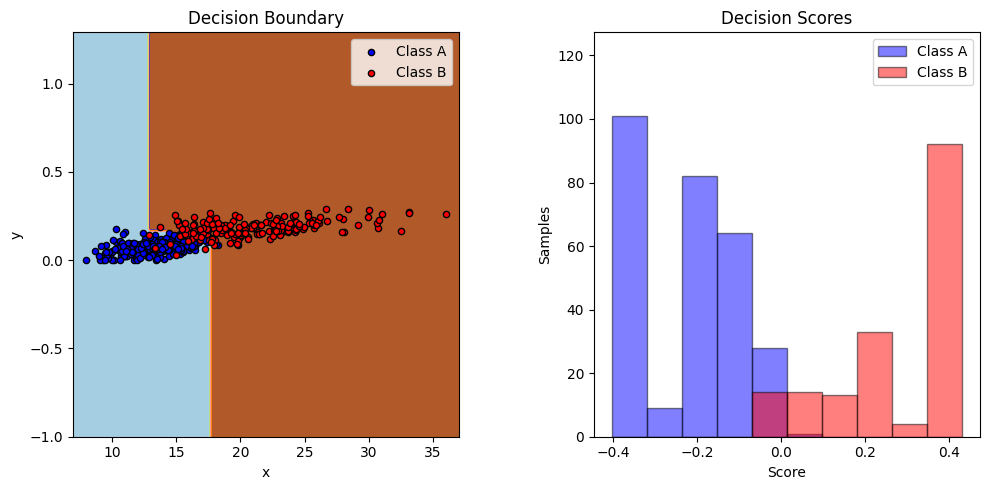

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# Get 2 features
XBreastCancer_2d = XBreastCancer[["radius3","concave_points3"]]
X_train, X_test, y_train, y_test = train_test_split(XBreastCancer_2d, YBreastCancer, test_size=0.20, random_state=101)
y_train = column_or_1d(y_train)

# Set Index for X_train
X_train.index = [i for i in range(len(X_train))]

bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200
)


bdt.fit(X_train, y_train)

plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
ax = plt.subplot(121)
disp = DecisionBoundaryDisplay.from_estimator(
    bdt,
    X_train,
    cmap=plt.cm.Paired,
    response_method="predict",
    ax=ax,
    xlabel="x",
    ylabel="y",
)
x_min, x_max = disp.xx0.min(), disp.xx0.max()
y_min, y_max = disp.xx1.min(), disp.xx1.max()
plt.axis("tight")


# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y_train == i)
    plt.scatter(
        X_train.loc[idx, "radius3"],
        X_train.loc[idx, "concave_points3"],
        c=c,
        cmap=plt.cm.Paired,
        s=20,
        edgecolor="k",
        label="Class %s" % n,
    )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc="upper right")

plt.title("Decision Boundary")

# Plot the two-class decision scores
twoclass_output = bdt.decision_function(X_train)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(
        twoclass_output[y_train == i],
        bins=10,
        range=plot_range,
        facecolor=c,
        label="Class %s" % n,
        alpha=0.5,
        edgecolor="k",
    )
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc="upper right")
plt.ylabel("Samples")
plt.xlabel("Score")
plt.title("Decision Scores")

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()

AdaBoost is a non-linear classifier

# Mice protein expression

In [ ]:
# 1. c. Load Mice Protein Expression Data Set
# > Download https://archive.ics.uci.edu/dataset/342/mice+protein+expression
mice = pd.read_excel('./Data_Cortex_Nuclear.xls')

In [ ]:
# Checking for null values
mice.isna().sum()
# There is no missing values in the data
mice.fillna(mice.median(), inplace=True)

<ipython-input-17-4de3cc66261b>:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mice.fillna(mice.median(), inplace=True)


In [ ]:
XMice = mice.drop(['MouseID','Genotype','Treatment','Behavior','class'], axis=1)
yMice = mice['Genotype']

In [ ]:
mice["Genotype"].unique()

array(['Control', 'Ts65Dn'], dtype=object)

In [ ]:
mice.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,...,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,0.425645,0.616959,0.319081,2.297267,3.843703,0.233163,0.181848,3.536524,0.212568,1.428480,...,0.226676,0.156810,0.133365,0.121521,0.130738,0.446073,0.167714,0.181540,0.202578,1.337784
std,0.249035,0.251304,0.049315,0.346810,0.931812,0.041577,0.027004,1.293415,0.032542,0.466270,...,0.028989,0.026555,0.023635,0.014276,0.023047,0.066432,0.054387,0.036406,0.048324,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288163,0.473669,0.287650,2.059152,3.160287,0.205821,0.164619,2.479861,0.190828,1.206389,...,0.206395,0.141045,0.119986,0.110839,0.114373,0.398082,0.133969,0.159168,0.174271,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487574,0.697500,0.348039,2.528035,4.425107,0.257225,0.197226,4.480652,0.234558,1.560931,...,0.241655,0.167584,0.139331,0.131955,0.142427,0.490773,0.187174,0.196133,0.219242,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


In [ ]:
mice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1080 non-null   float64
 2   ITSN1_N          1080 non-null   float64
 3   BDNF_N           1080 non-null   float64
 4   NR1_N            1080 non-null   float64
 5   NR2A_N           1080 non-null   float64
 6   pAKT_N           1080 non-null   float64
 7   pBRAF_N          1080 non-null   float64
 8   pCAMKII_N        1080 non-null   float64
 9   pCREB_N          1080 non-null   float64
 10  pELK_N           1080 non-null   float64
 11  pERK_N           1080 non-null   float64
 12  pJNK_N           1080 non-null   float64
 13  PKCA_N           1080 non-null   float64
 14  pMEK_N           1080 non-null   float64
 15  pNR1_N           1080 non-null   float64
 16  pNR2A_N          1080 non-null   float64
 17  pNR2B_N       

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
yMice = le.fit_transform(yMice)
print(yMice)

[0 0 0 ... 1 1 1]


In [ ]:
le.classes_

array(['Control', 'Ts65Dn'], dtype=object)

In [ ]:
XMice["Genotype"] = yMice


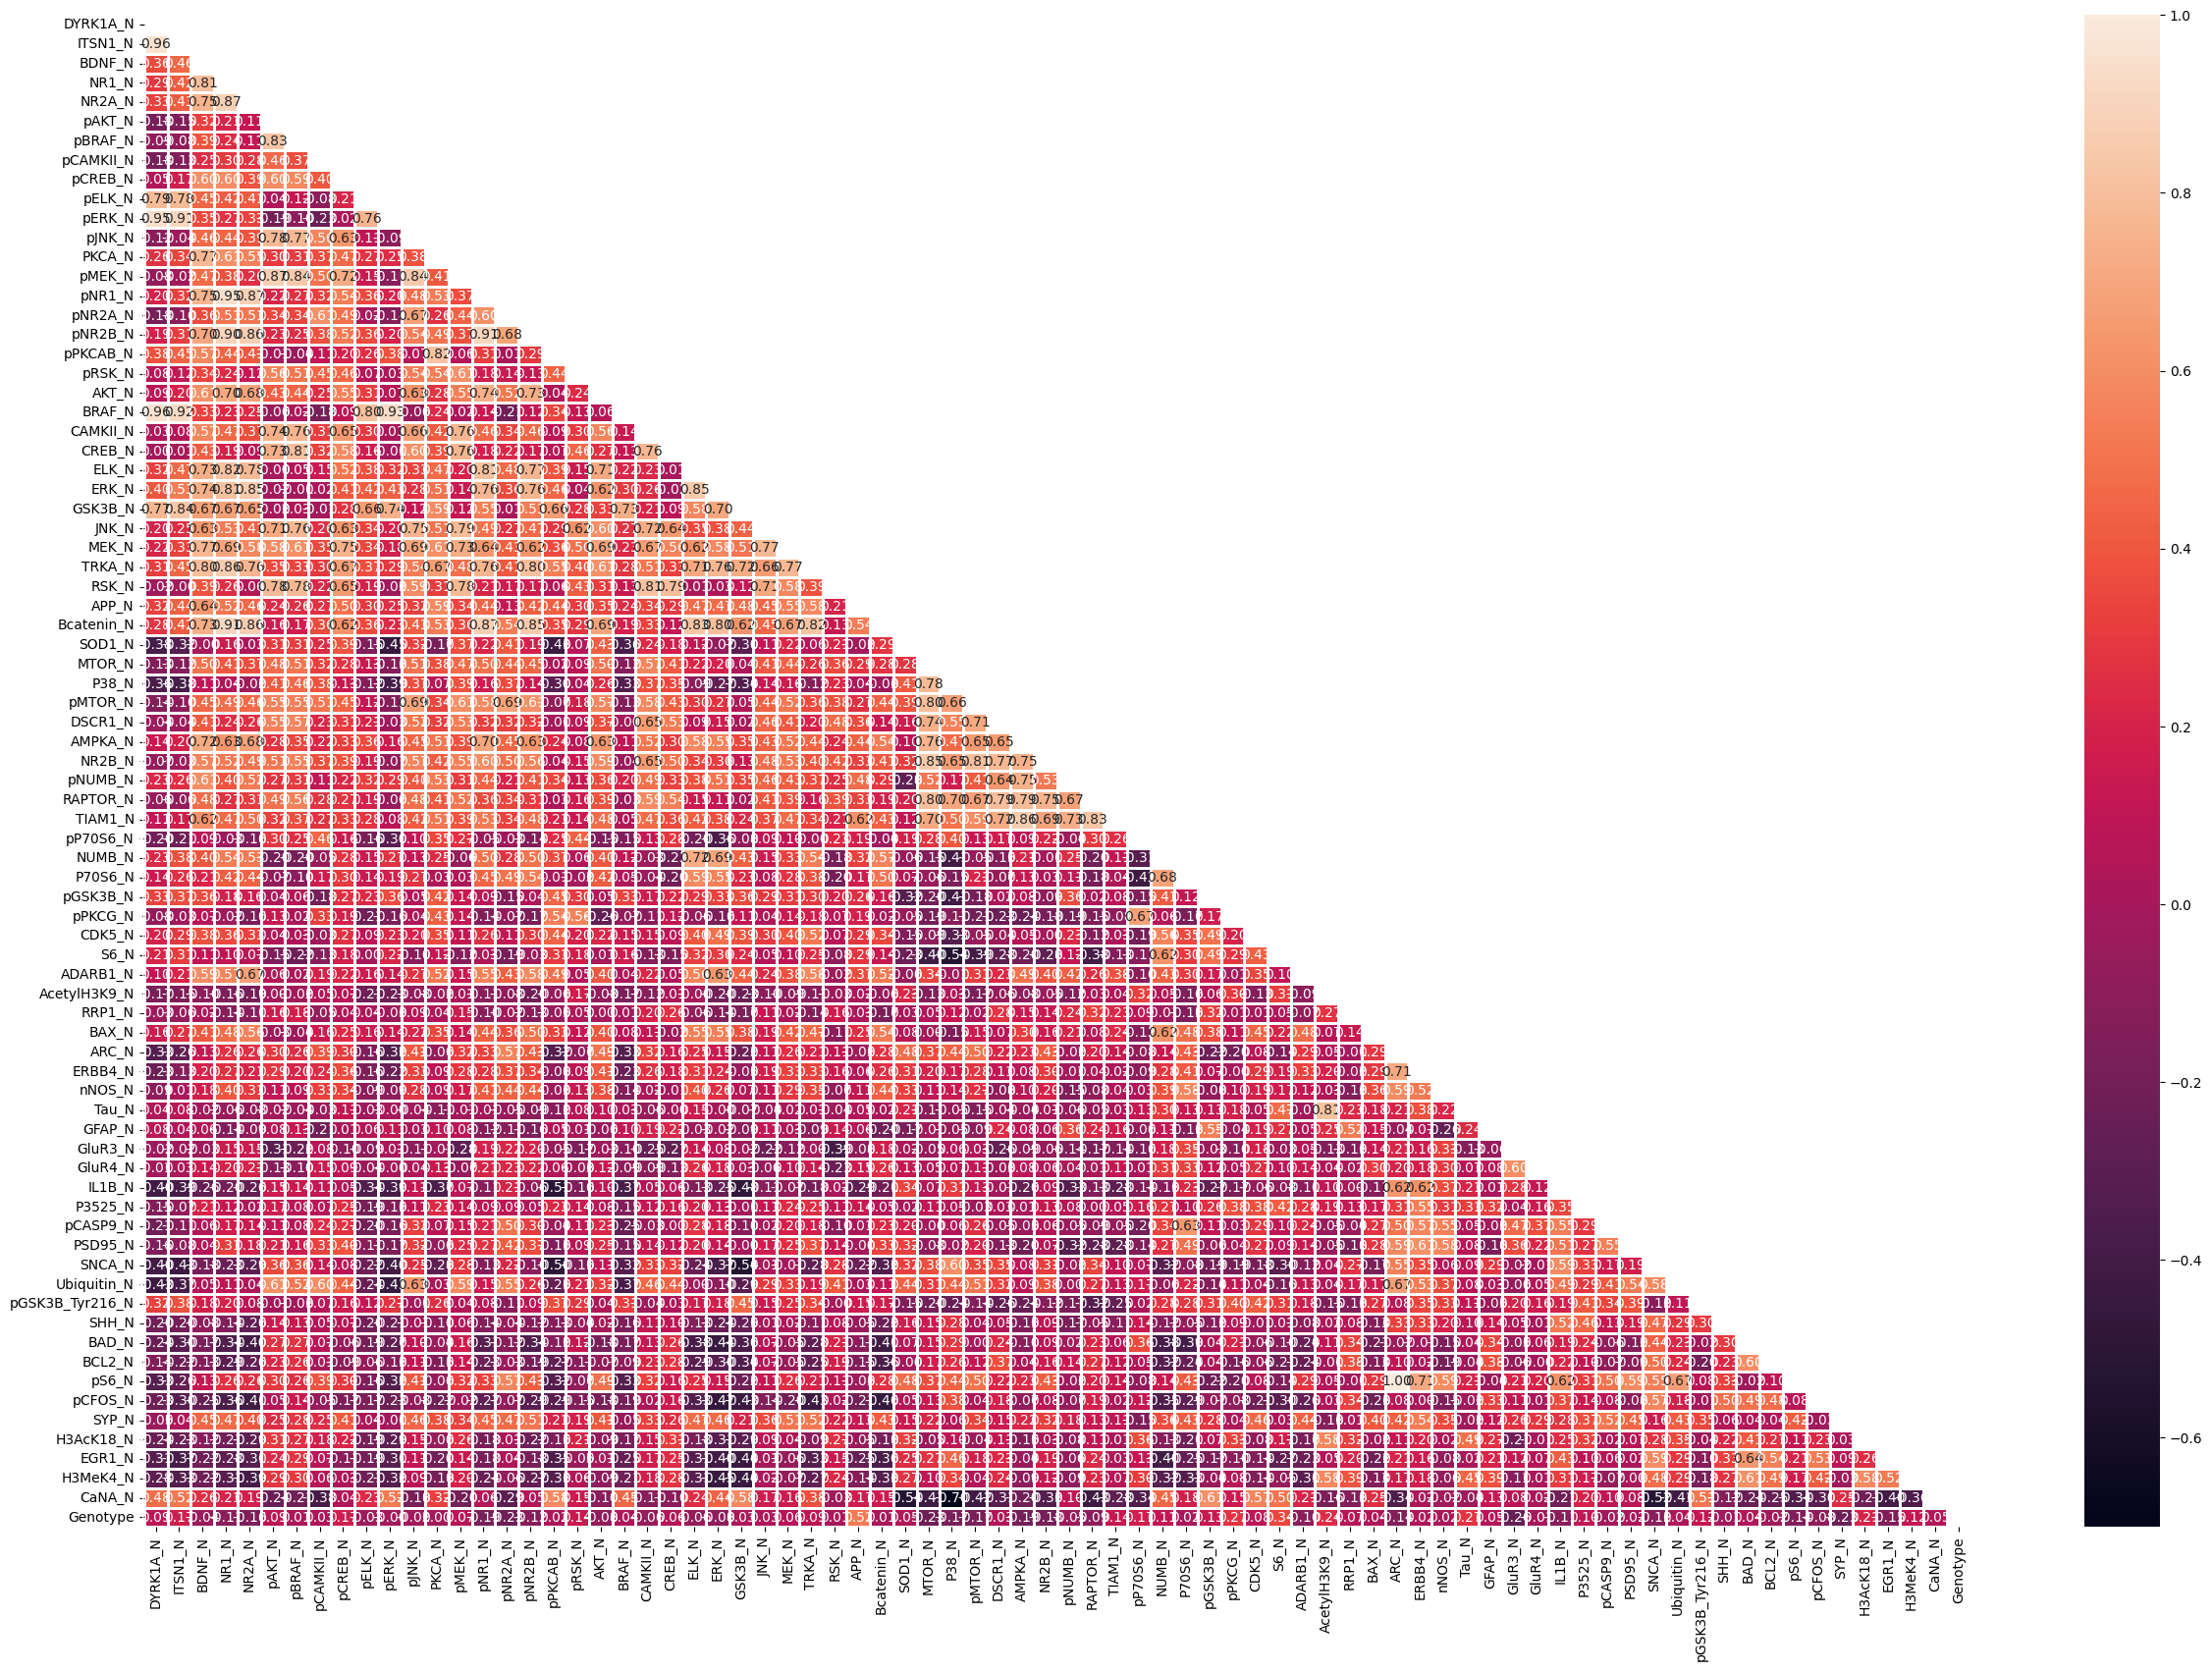

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (30, 20))

corr = XMice.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

# We can see that there are many columns which are very highly correlated. We can remove columns that have a high absolute correlation with each other as it can cause instability and overfitting in certain algorithms. (eliminate multicollinearity, where 2 or more variables are highly correlated)

In [ ]:
# 4. Find correlated variables in both data sets. Find the correlation coefficients between variables with corr, pval = spearmanr(data1, data2). Are there a lot of variables which are strongly correlated? What is the meaning of the sign of the correlation coefficient?
spearman_correlations = {}
for col in XMice.columns:
    if col != "Genotype":
      correlation, _ = spearmanr(XMice[col], XMice['Genotype'])  # Assuming 'target' is the target variable
      spearman_correlations[col] = correlation


In [ ]:
# Create a DataFrame to display the results
correlation_df = pd.DataFrame.from_dict(spearman_correlations, orient='index', columns=['Spearman Correlation'])

# Sort the variables by their correlation values
correlation_df = correlation_df.sort_values(by='Spearman Correlation', ascending=False)

# Print or display the results
print(correlation_df)

              Spearman Correlation
APP_N                     0.541178
ITSN1_N                   0.360305
S6_N                      0.352134
Tau_N                     0.351271
AcetylH3K9_N              0.309914
...                            ...
pNR2A_N                  -0.206157
AMPKA_N                  -0.215312
MTOR_N                   -0.226529
SYP_N                    -0.230946
GluR3_N                  -0.248139

[77 rows x 1 columns]


In [ ]:
# Compare the distributions of variables in two classes with stats.ttest ind().
# Group your data by class
first_class = XMice[XMice["Genotype"] == 0]
second_class = XMice[XMice["Genotype"] == 1]

# Define the significance level (alpha)
alpha = 0.05  # You can adjust this value based on your desired level of significance

# Loop through each variable and perform two-sample t-test
for var in XMice.columns:
    if var != "Genotype":
      variable_to_compare_A = first_class[var]
      variable_to_compare_B = second_class[var]

      t_statistic, p_value = stats.ttest_ind(variable_to_compare_A, variable_to_compare_B)

      print(f"Variable: {var}")
      print(f"  T-Statistic: {t_statistic}")
      print(f"  P-Value: {p_value}")

      if p_value < alpha:
          print("  The means of the two classes are significantly different.")
      else:
          print("  The means of the two classes are not significantly different.")



Variable: DYRK1A_N
  T-Statistic: -2.9243672410387656
  P-Value: 0.0035237943268834975
  The means of the two classes are significantly different.
Variable: ITSN1_N
  T-Statistic: -5.756595175586465
  P-Value: 1.1181687448824531e-08
  The means of the two classes are significantly different.
Variable: BDNF_N
  T-Statistic: 1.4451745510460432
  P-Value: 0.14869948203112307
  The means of the two classes are not significantly different.
Variable: NR1_N
  T-Statistic: 3.6661758547910033
  P-Value: 0.0002582083899926514
  The means of the two classes are significantly different.
Variable: NR2A_N
  T-Statistic: 5.322781362221081
  P-Value: 1.2428861024109363e-07
  The means of the two classes are significantly different.
Variable: pAKT_N
  T-Statistic: -3.0064946992128116
  P-Value: 0.0027040040544084264
  The means of the two classes are significantly different.
Variable: pBRAF_N
  T-Statistic: -0.4285068476646593
  P-Value: 0.6683677543059764
  The means of the two classes are not signifi

## Boxplot

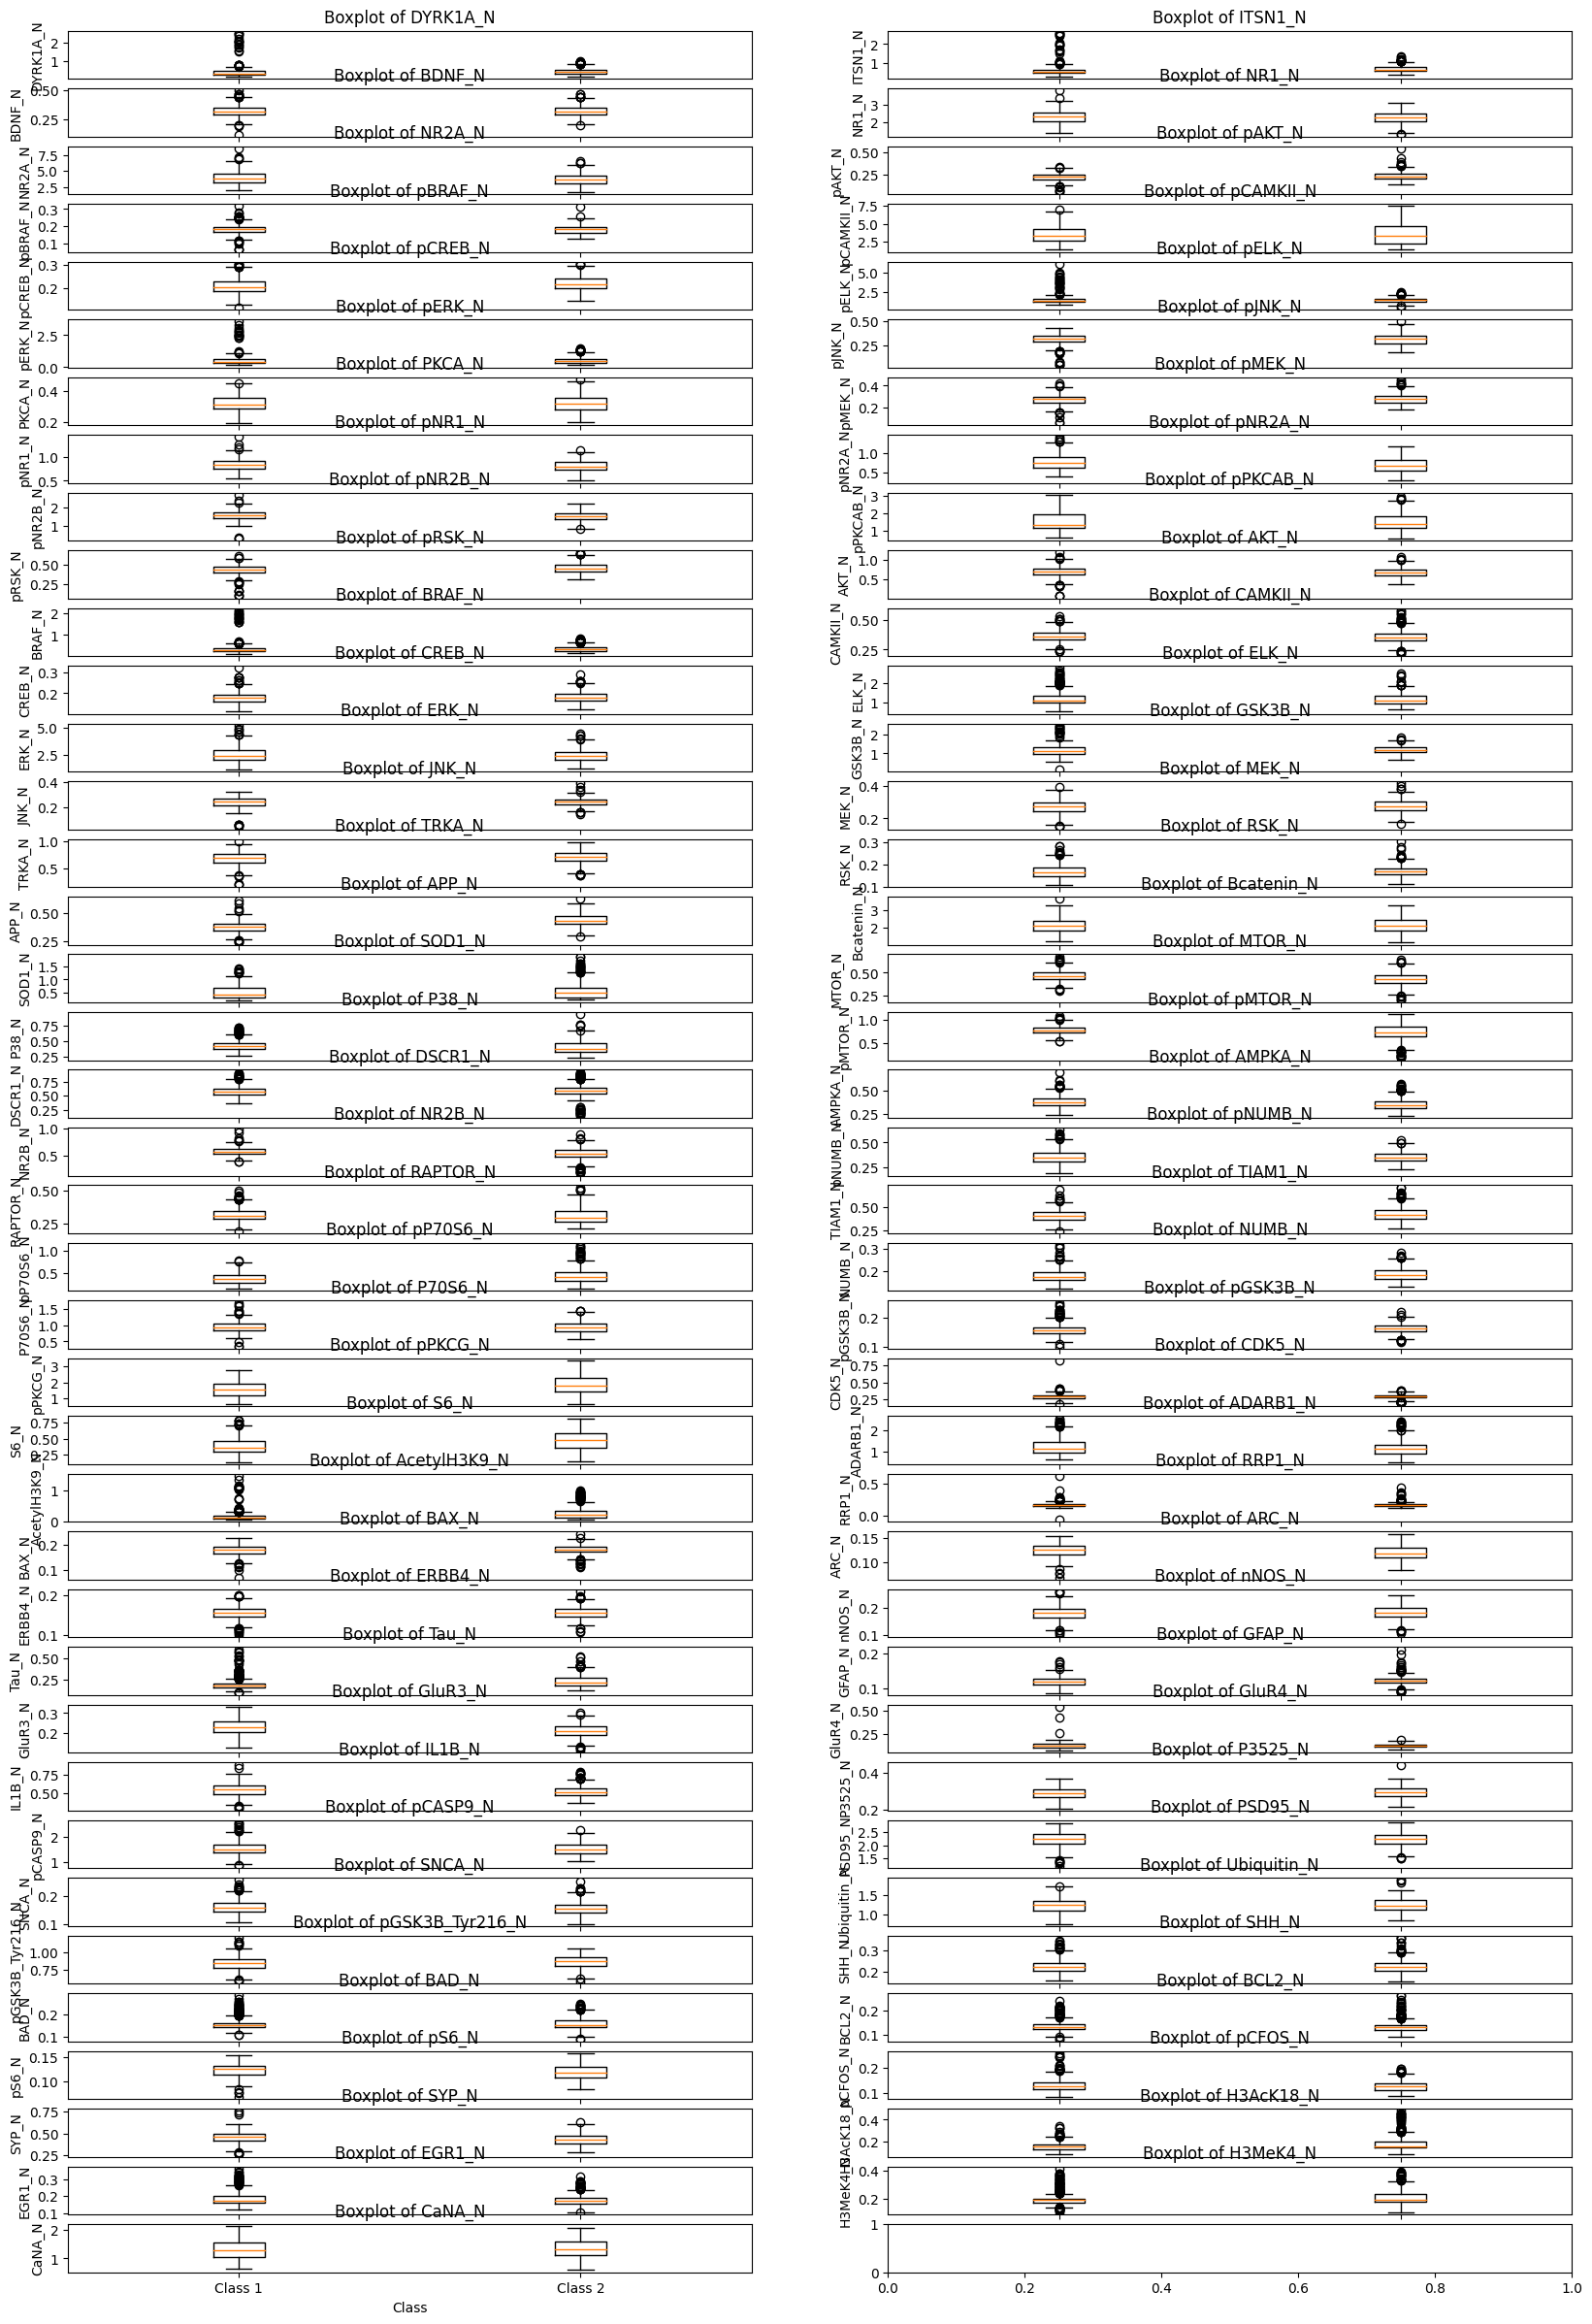

In [ ]:
# Create boxplots for each variable in class 1 and class 2
# Define the number of rows and columns for the subplots
import matplotlib.pyplot as plt

num_rows = (len(XMice.columns) -1) // 2 + 1
num_cols = 2
# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))
# Flatten the axes array for easy indexing
axes = axes.ravel()
for i, variable_name in enumerate(XMice.columns):
  if variable_name != "Genotype":
    ax = axes[i]
    ax.boxplot([first_class[variable_name], second_class[variable_name]])
    ax.set_title(f'Boxplot of {variable_name}')
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['Class 1', 'Class 2'])
    ax.set_xlabel('Class')
    ax.set_ylabel(variable_name)

# Adaboost

In [ ]:
# Split data
from sklearn.model_selection import train_test_split
XMice = XMice.drop(["Genotype"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(XMice, yMice, test_size=0.20, random_state=101)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(864, 77)
(864,)
(216, 77)
(216,)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=5, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8194444444444444

#  Test various number of weak lerners

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.utils.validation import column_or_1d
# Define a range of values for the number of weak learners (estimators)
n_estimators_values = [10, 50, 100, 200, 300]

# Initialize lists to store cross-validation scores
cv_scores = []
y_train = column_or_1d(y_train)
# Loop through different values of n_estimators and perform cross-validation
for n_estimators in n_estimators_values:
    ada_boost = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
    scores = cross_val_score(ada_boost, X_test, y_test, cv=5)  # You can adjust the number of cross-validation folds (cv) as needed
    cv_scores.append(np.mean(scores))

# Find the value of n_estimators that results in the highest cross-validation score
best_n_estimators = n_estimators_values[np.argmax(cv_scores)]

# Print the cross-validation scores for different values of n_estimators
for n, score in zip(n_estimators_values, cv_scores):
    print(f"n_estimators = {n}: Mean Accuracy = {score:.4f}")

print(f"Best n_estimators: {best_n_estimators}")

n_estimators = 10: Mean Accuracy = 0.8702
n_estimators = 50: Mean Accuracy = 0.9305
n_estimators = 100: Mean Accuracy = 0.9166
n_estimators = 200: Mean Accuracy = 0.9305
n_estimators = 300: Mean Accuracy = 0.9489
Best n_estimators: 300


<ipython-input-63-fc77ce37e793>:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-63-fc77ce37e793>:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


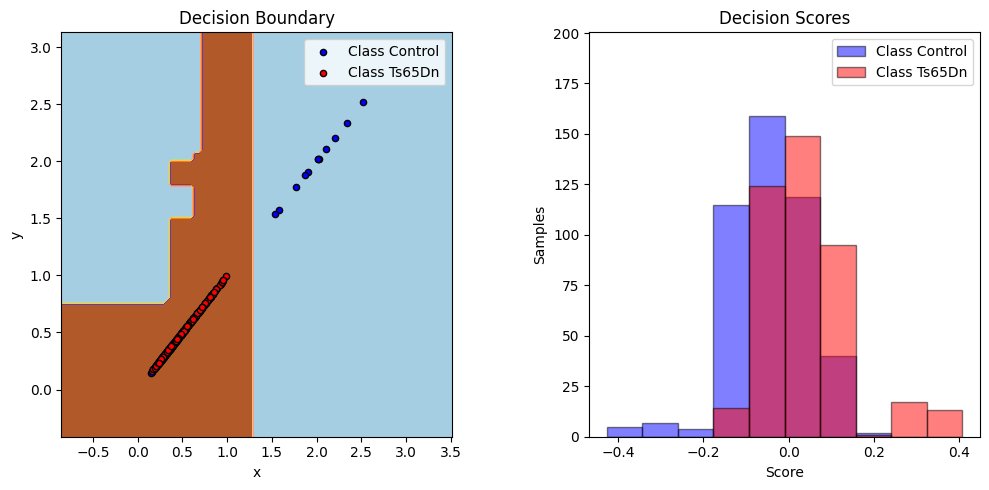

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# Get 2 features
XMice_2d = XMice[["DYRK1A_N","CaNA_N"]]
X_train, X_test, y_train, y_test = train_test_split(XMice_2d, yMice, test_size=0.20, random_state=101)

# Set Index for X_train
X_train.index = [i for i in range(len(X_train))]

bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200
)


bdt.fit(X_train, y_train)

plot_colors = "br"
plot_step = 0.02
class_names = ['Control', 'Ts65Dn']

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
ax = plt.subplot(121)
disp = DecisionBoundaryDisplay.from_estimator(
    bdt,
    X_train,
    cmap=plt.cm.Paired,
    response_method="predict",
    ax=ax,
    xlabel="x",
    ylabel="y",
)
x_min, x_max = disp.xx0.min(), disp.xx0.max()
y_min, y_max = disp.xx1.min(), disp.xx1.max()
plt.axis("tight")


# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y_train == i)
    plt.scatter(
        X_train.loc[idx, "DYRK1A_N"],
        X_train.loc[idx, "DYRK1A_N"],
        c=c,
        cmap=plt.cm.Paired,
        s=20,
        edgecolor="k",
        label="Class %s" % n,
    )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc="upper right")

plt.title("Decision Boundary")

# Plot the two-class decision scores
twoclass_output = bdt.decision_function(X_train)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(
        twoclass_output[y_train == i],
        bins=10,
        range=plot_range,
        facecolor=c,
        label="Class %s" % n,
        alpha=0.5,
        edgecolor="k",
    )
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc="upper right")
plt.ylabel("Samples")
plt.xlabel("Score")
plt.title("Decision Scores")

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()